<a href="https://colab.research.google.com/github/jinay780/python/blob/master/Black_friday_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
print(train.shape)
print(test.shape)

(550068, 12)
(233599, 11)


In [6]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
train.Product_Category_2=train.Product_Category_2.fillna(train.Product_Category_2.mean())
train.Product_Category_3=train.Product_Category_3.fillna(train.Product_Category_3.mean())

In [8]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [9]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [10]:
test.Product_Category_2=test.Product_Category_2.fillna(test.Product_Category_2.mean())
test.Product_Category_3=test.Product_Category_3.fillna(test.Product_Category_3.mean())

In [11]:
test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [12]:
train['Stay_In_Current_City_Years']=(train['Stay_In_Current_City_Years'].str.strip('+'))
train['Age']=(train['Age'].str.strip('+'))

In [13]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
train['Gender']=label.fit_transform(train['Gender'])
train['Age']=label.fit_transform(train['Age'])
train['City_Category']=label.fit_transform(train['City_Category'])

In [14]:
train['Gender'].value_counts()

1    414259
0    135809
Name: Gender, dtype: int64

In [15]:
age=train['Age'].value_counts()

In [16]:
city=train['City_Category'].value_counts()

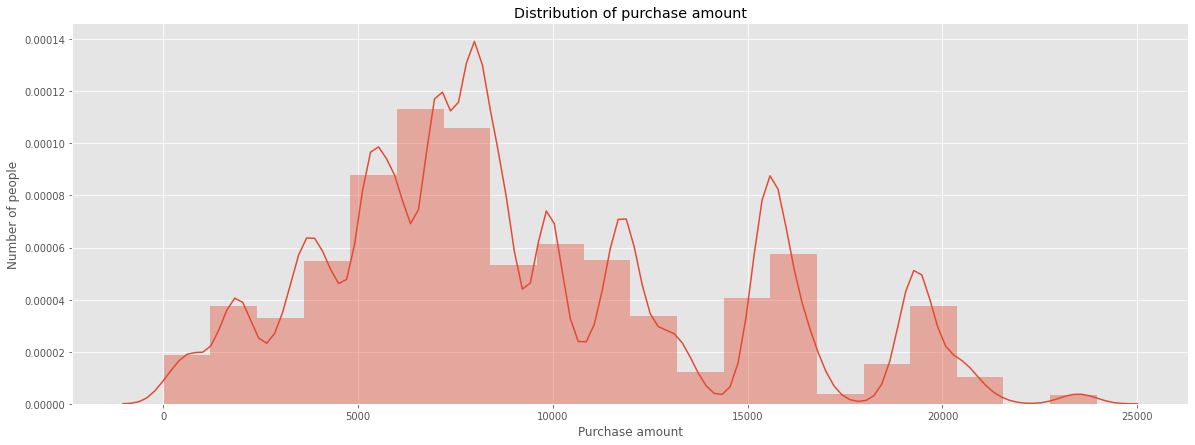

In [17]:
plt.style.use('ggplot')
plt.figure(figsize = (20, 7))
sns.distplot(train['Purchase'], bins = 20)
plt.title('Distribution of purchase amount')
plt.xlabel('Purchase amount')
plt.ylabel('Number of people')
plt.show()

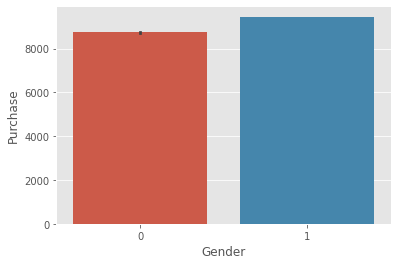

In [18]:
sns.barplot(x='Gender',y='Purchase',data=train)

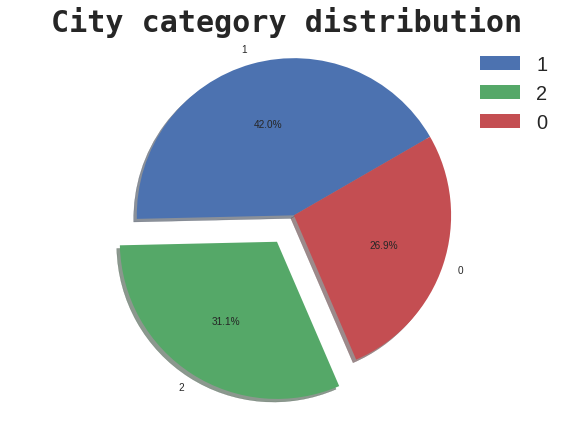

In [19]:
plt.style.use('seaborn')
plt.figure(figsize = (10, 7))
plt.pie(city.values, labels = city.index, startangle = 30, explode = (0 , 0.20, 0), shadow = True, autopct = '%1.1f%%')
plt.title('City category distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.legend()
plt.legend(prop = {'size' : 20})
plt.axis('equal')
plt.show()

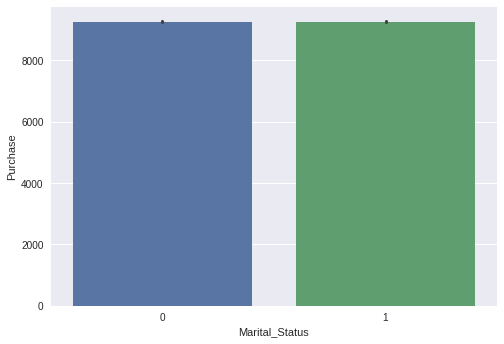

In [20]:
sns.barplot(x='Marital_Status',y='Purchase',data=train)

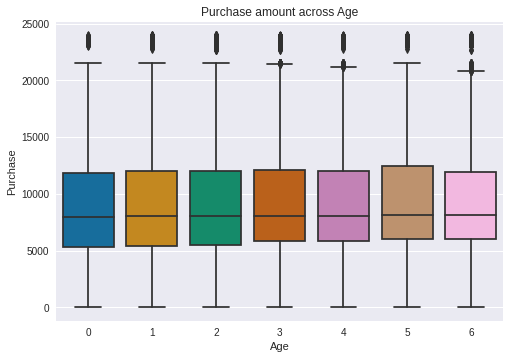

In [21]:
sns.boxplot(train['Age'], train['Purchase'], palette = 'colorblind')
plt.title('Purchase amount across Age')
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.show()

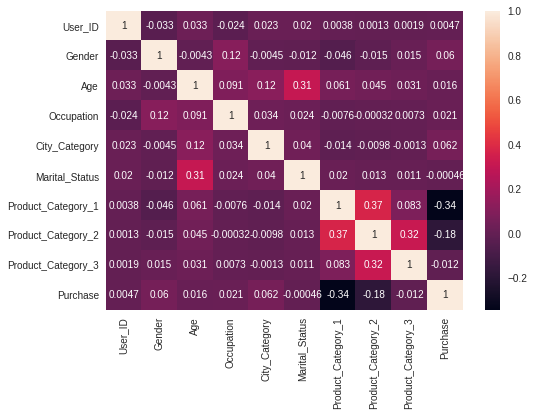

In [22]:
sns.heatmap(train.corr(),annot=True)

In [23]:
train.drop(['User_ID','Product_ID',],axis=1,inplace=True)

In [24]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,9.842329,12.668243,8370
1,0,0,10,0,2,0,1,6.000000,14.000000,15200
2,0,0,10,0,2,0,12,9.842329,12.668243,1422
3,0,0,10,0,2,0,12,14.000000,12.668243,1057
4,1,6,16,2,4,0,8,9.842329,12.668243,7969


In [25]:
x=train.drop('Purchase',axis=1)
y=train['Purchase']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for col in x.columns:
  x[col] = sc.fit_transform(x[col].values.reshape(-1, 1))

In [28]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
pred=model.predict(x_test)

In [30]:
from sklearn.metrics import r2_score,mean_squared_error
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))
print("R2 score:", r2_score(y_test, pred)) 

RMSE: 4686.979451678854
R2 score: 0.1274532214068217


In [31]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor(n_estimators=10)
model1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
y_pred=model1.predict(x_test)

In [33]:
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score:", r2_score(y_test, y_pred))

RMSE: 3093.5420112716415
R2 score: 0.6198853072452064


In [34]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()
model2.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [35]:
pred1=model2.predict(x_test)

In [36]:
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred1)))
print("R2 score:", r2_score(y_test, pred1))

RMSE: 3339.9113853955228
R2 score: 0.5569298329805563
